In [1]:
# Import 3rd party libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install geopandas
import geopandas as gpd

✨🍰✨ Everything looks OK!

CondaError: KeyboardInterrupt



In [ ]:
!pip install folium
import folium
from folium import Circle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/CIV1498 Final Project/Data/cleaned_data'
file_lst = os.listdir(path)
file_2017 = []
file_2018 = []
file_2019 = []
file_2020 = []
file_2021 = []
for file_name in file_lst:
  if '2017' in file_name:
    file_2017.append(file_name)
  if '2018' in file_name:
    file_2018.append(file_name)
  if '2019' in file_name:
    file_2019.append(file_name)
  if '2020' in file_name:
    file_2020.append(file_name)
  if '2021' in file_name:
    file_2021.append(file_name)

In [ ]:
#2017 data
bike_2017 = pd.read_csv(path+'/'+file_2017[0])
weather_2017 = pd.read_csv(path+'/'+file_2017[1])

In [ ]:
#2018 data
bike_2018 = pd.read_csv(path+'/'+file_2018[0])
weather_2018 = pd.read_csv(path+'/'+file_2018[1])

In [ ]:
#2019 data
bike_2019 = pd.read_csv(path+'/'+file_2019[0])
weather_2019 = pd.read_csv(path+'/'+file_2019[1])

In [ ]:
#2020 data
bike_2020 = pd.read_csv(path+'/'+file_2020[0])
weather_2020 = pd.read_csv(path+'/'+file_2020[1])

In [ ]:
#2021 data
bike_2021 = pd.read_csv(path+'/'+file_2021[0])
weather_2021 = pd.read_csv(path+'/'+file_2021[1])

In [ ]:
# Create a function to convert timezone to EST
def Datetime_to_EST(data):
  if data['start_time'].str.contains('UTC').all():
    data['start_time'] = data['start_time'].str.replace(r"\(.*\)","").str.strip()
    data['end_time'] = data['end_time'].str.replace(r"\(.*\)","").str.strip()
    data['start_time'] = pd.to_datetime(data['start_time'], format='%Y-%m-%d %H:%M').apply(lambda x: x.tz_localize('UTC').tz_convert('EST'))
    data['end_time'] = pd.to_datetime(data['end_time'], format='%Y-%m-%d %H:%M').apply(lambda x: x.tz_localize('UTC').tz_convert('EST'))
  elif data['start_time'].str.contains('EST').all():
    data['start_time'] = data['start_time'].str.replace(r"\(.*\)","").str.strip()
    data['end_time'] = data['end_time'].str.replace(r"\(.*\)","").str.strip()
    data['start_time'] = pd.to_datetime(data['start_time'], format='%d/%m/%Y %H:%M:%S').apply(lambda x: x.tz_localize('EST'))
    data['end_time'] = pd.to_datetime(data['end_time'], format='%d/%m/%Y %H:%M:%S').apply(lambda x: x.tz_localize('EST'))
  return data

In [ ]:
bike_2017 = Datetime_to_EST(bike_2017)
bike_2018 = Datetime_to_EST(bike_2018)
bike_2019 = Datetime_to_EST(bike_2019)
bike_2020 = Datetime_to_EST(bike_2020)
bike_2021 = Datetime_to_EST(bike_2021)

In [ ]:
# Concat 5-year Bike Data into One DataFrame
bike_list = [bike_2017,bike_2018,bike_2019,bike_2020,bike_2021]
bike_df = pd.concat(bike_list)

In [ ]:
# Concat 5-year Weather Data into One DataFrame
weather_list = [weather_2017,weather_2018,weather_2019,weather_2020,weather_2021]
weather_df = pd.concat(weather_list)

In [ ]:
# Convert Index to Timestamp for Weather
weather_datetime_series = pd.to_datetime(weather_df["Date/Time"])
weather_datetime_index = pd.DatetimeIndex(weather_datetime_series.values)

weather_df = weather_df.set_index(weather_datetime_index).drop(columns = "Date/Time") # replace the original index with the new datetime_index
weather_df.index = weather_df.index.tz_localize('EST')

# View DataFrame
weather_df.head()

,Longitude (x),Latitude (y),Station Name,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2017-06-01 00:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,2017,6,1,00:00,15.0,7.1,59.0,31.0,15.0,16.1,100.40,NaN
2017-06-01 01:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,2017,6,1,01:00,14.5,7.0,61.0,30.0,11.0,16.1,100.41,NaN
2017-06-01 02:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,2017,6,1,02:00,14.0,7.4,64.0,28.0,9.0,16.1,100.41,NaN
2017-06-01 03:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,2017,6,1,03:00,13.4,7.2,66.0,28.0,21.0,16.1,100.44,NaN
2017-06-01 04:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,2017,6,1,04:00,12.1,7.2,72.0,27.0,17.0,16.1,100.49,NaN


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12195482 entries, 0 to 3429332
Data columns (total 9 columns):
 #   Column              Dtype              
---  ------              -----              
 0   trip_id             float64            
 1   user_type           object             
 2   start_time          datetime64[ns, EST]
 3   end_time            datetime64[ns, EST]
 4   duration            int64              
 5   start_station_id    float64            
 6   start_station_name  object             
 7   end_station_id      float64            
 8   end_station_name    object             
dtypes: datetime64[ns, EST](2), float64(3), int64(1), object(3)
memory usage: 930.4+ MB


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2017-06-01 00:00:00-05:00 to 2021-12-31 23:00:00-05:00
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Longitude (x)        43824 non-null  float64
 1   Latitude (y)         43824 non-null  float64
 2   Station Name         43824 non-null  object 
 3   Year                 43824 non-null  int64  
 4   Month                43824 non-null  int64  
 5   Day                  43824 non-null  int64  
 6   Time                 43824 non-null  object 
 7   Temp (°C)            43675 non-null  float64
 8   Dew Point Temp (°C)  43600 non-null  float64
 9   Rel Hum (%)          43613 non-null  float64
 10  Wind Dir (10s deg)   41293 non-null  float64
 11  Wind Spd (km/h)      43755 non-null  float64
 12  Visibility (km)      43753 non-null  float64
 13  Stn Press (kPa)      43672 non-null  float64
 14  Weather              6767 non-null   ob

In [ ]:
# Dealing with Missing Data for Weather
weather_df_missing = pd.DataFrame(weather_df.isna().sum()).rename(columns={0:"count"})

# View DataFrame
weather_df_missing

,count
Longitude (x),0
Latitude (y),0
Station Name,0
Year,0
Month,0
Day,0
Time,0
Temp (°C),149
Dew Point Temp (°C),224
Rel Hum (%),211


In [ ]:
weather_df['Weather'].unique().tolist()

[nan,
 'Rain',
 'Thunderstorms,Rain,Fog',
 'Fog',
 'Rain,Fog',
 'Thunderstorms',
 'Thunderstorms,Rain',
 'Thunderstorms,Moderate Rain',
 'Moderate Rain,Fog',
 'Snow',
 'Freezing Rain,Fog',
 'Haze',
 'Rain,Snow',
 'Moderate Rain',
 'Thunderstorms,Moderate Rain,Fog',
 'Thunderstorms,Heavy Rain,Fog',
 'Moderate Snow',
 'Heavy Rain,Fog',
 'Freezing Rain',
 'Freezing Rain,Snow',
 'Thunderstorms,Fog',
 'Thunderstorms,Heavy Rain',
 'Heavy Snow',
 'Snow,Blowing Snow',
 'Haze,Blowing Snow']

In [ ]:
# Save Cleaned Data to cleaned_data2 folder
weather_df.to_csv('/content/drive/MyDrive/CIV1498 Final Project/Data/cleaned_data2/weather_df.csv')

In [ ]:
# Dealing with Missing Data for Trip
bike_df_missing = pd.DataFrame(bike_df.isna().sum()).rename(columns={0:"count"})

# View DataFrame
bike_df_missing

,count
trip_id,0
user_type,0
start_time,0
end_time,1
duration,0
start_station_id,1026893
start_station_name,3313
end_station_id,1030516
end_station_name,7023


In [ ]:
# Check % of Missing Values
start_station_id_missing = bike_df_missing.loc['start_station_id',]['count']
end_station_id_missing = bike_df_missing.loc['end_station_id',]['count']
max_missing_percentage = bike_df_missing['count'].nlargest(1)[0]/12195482*100
print("For trips_data, we can see that 'Start Station Name' and 'End Station Name' have",start_station_id_missing,"and", end_station_id_missing, "missing values, respectively, which is only up to", max_missing_percentage, "% of the dataset. This might suggest corruption and given the small number of missing values, we can safetly drop these rows.However, since we are not dealing with neighborhoods, we will only need to drop rows with end datetime is NaN.")

For trips_data, we can see that 'Start Station Name' and 'End Station Name' have 1026893 and 1030516 missing values, respectively, which is only up to 8.449981722739617 % of the dataset. This might suggest corruption and given the small number of missing values, we can safetly drop these rows.However, since we are not dealing with neighborhoods, we will only need to drop rows with end datetime is NaN.


In [ ]:
# Drop any rows of bike_df with missing values.
bike_df = bike_df[bike_df['end_time'].notna()]

# View DataFrame
print(pd.DataFrame(bike_df.isna().sum()).rename(columns={0:"count"}))

                      count
trip_id                   0
user_type                 0
start_time                0
end_time                  0
duration                  0
start_station_id    1026892
start_station_name     3313
end_station_id      1030515
end_station_name       7022


In [ ]:
# We've been told by Bike Share Toronto that trips lasting less than 1 minute can be considered false trips. Remove all trips from trips_data with a duration less than 60 seconds.
bike_df = bike_df[bike_df['duration'] >= 60]

Remove any `'duration'` values less than `Q1 - 1.5 * IQR` and greater than `Q3 + 1.5 * IQR`. 

- Q1: The first quartile (`.quantile(0.25)`)
- Q3: The third quartile (`.quantile(0.75)`)
- IQR: The first quartil (`Q3 - Q1`)
<br> 

In [ ]:
Q1 = bike_df['duration'].quantile(0.25)
Q3 = bike_df['duration'].quantile(0.75)
IQR = Q3 - Q1
max_duration = Q3 + 1.5 * IQR
min_duration = Q1 - 1.5 * IQR

bike_df = bike_df[(bike_df['duration'] > min_duration)&(bike_df['duration'] < max_duration)]

[Text(0, 0.5, 'Probability Density'),
 Text(0.5, 0, 'Trip Duration, minutes'),
 Text(0.5, 1.0, 'Distribusion of trip durations')]

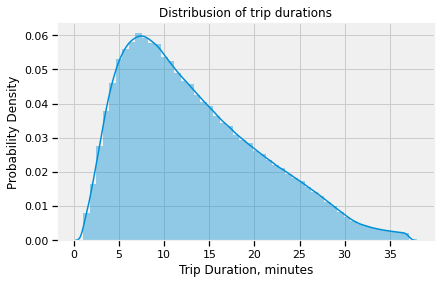

In [ ]:
# 可以删了。。。就是顺手画一个
sns.distplot(bike_df['duration'].div(60)).set(xlabel = "Trip Duration, minutes",
                                              ylabel = "Probability Density",
                                              title = "Distribusion of trip durations")

In [ ]:
# Formatting Data
bike_df['start_station_name'] = bike_df['start_station_name'].str.replace(r"\(.*\)","").str.strip()
bike_df['end_station_name'] = bike_df['end_station_name'].str.replace(r"\(.*\)","").str.strip()
bike_df['trip_id'] = bike_df['trip_id'].astype('int')
bike_df = bike_df.drop(['start_station_id','end_station_id'],axis = 1)
bike_df = bike_df.drop_duplicates(subset=['trip_id'], keep='first')

In [ ]:
# Function for assigning datetime for week of day, period of day, and season of year
def Assign_Datetime_Pre_Aggregation(data):
  # Assign Period of a Day
  # We will be mapping 1 for early morning (0:00-6:00), 2 for AM Peak (6:00-9:59), 3 for Midday (10:00-14:59), 4 for PM Peak (3:00-6:59), 5 for Evening (7:00-23:59 )
  hour_of_day = []
  for datetime_est in data["start_time"]:
      hour_of_day.append(datetime_est.hour + datetime_est.minute/60 + datetime_est.second/60**2)
  data['hour_of_day'] = hour_of_day

  def period(x):
      bins = np.array([0,6,10,15,19,24])  
      pod = np.digitize(x,bins)
      return pod
  data['period'] = data['hour_of_day'].apply(period)
  
  # Assign Day of a Week
  data['day_of_week'] = data["start_time"].apply(lambda x: x.dayofweek)

  # Assign Season of a Year
  # We will be mapping month of 12,1,2 to 1 (winter), 3,4,5 to 2 (spring), 6,7,8 to 3 (summer), and 9,10,11 to 4 (fall).
  data['season'] = (data['start_time'].apply(lambda x: x.month))%12//3+1

  return data

In [ ]:
bike_df = Assign_Datetime_Pre_Aggregation(bike_df)
bike_df.head()

,trip_id,user_type,start_time,end_time,duration,start_station_name,end_station_name,hour_of_day,period,day_of_week,season
0,712441,Member,2017-01-01 00:03:00-05:00,2017-01-01 00:08:00-05:00,274,Bay St / College St,Bay St / Albert St,0.050000,1,6,1
1,712442,Member,2017-01-01 00:03:00-05:00,2017-01-01 00:12:00-05:00,538,Niagara St / Richmond St W,King St W / Fraser Ave,0.050000,1,6,1
2,712443,Member,2017-01-01 00:05:00-05:00,2017-01-01 00:22:00-05:00,992,Front St / Yonge St,Church St / Wood St,0.083333,1,6,1
3,712444,Member,2017-01-01 00:09:00-05:00,2017-01-01 00:26:00-05:00,1005,East Liberty St / Pirandello St,Queen St W / York St,0.150000,1,6,1
4,712445,Member,2017-01-01 00:14:00-05:00,2017-01-01 00:25:00-05:00,645,Bathurst St / Queens Quay W,King St W / Spadina Ave,0.233333,1,6,1


In [ ]:
# Check the Bike Data
print(bike_df.describe())

            trip_id      duration   hour_of_day        period   day_of_week  \
count  1.162820e+07  1.162820e+07  1.162820e+07  1.162820e+07  1.162820e+07   
mean   7.656649e+06  7.985038e+02  1.497232e+01  3.550001e+00  3.016380e+00   
std    4.010862e+06  4.528152e+02  4.864321e+00  1.085011e+00  1.966344e+00   
min    7.123820e+05  6.000000e+01  0.000000e+00  1.000000e+00  0.000000e+00   
25%    4.191966e+06  4.380000e+02  1.160000e+01  3.000000e+00  1.000000e+00   
50%    7.608304e+06  7.100000e+02  1.590000e+01  4.000000e+00  3.000000e+00   
75%    1.111768e+07  1.094000e+03  1.855000e+01  4.000000e+00  5.000000e+00   
max    1.463520e+07  2.228000e+03  2.398333e+01  5.000000e+00  6.000000e+00   

             season  
count  1.162820e+07  
mean   2.971439e+00  
std    9.024266e-01  
min    1.000000e+00  
25%    2.000000e+00  
50%    3.000000e+00  
75%    4.000000e+00  
max    4.000000e+00  


In [ ]:
# Convert Index to Timestamp for Bike
trip_df = bike_df.copy()
trip_datetime_index = pd.DatetimeIndex(trip_df.start_time)
trip_df = trip_df.set_index(trip_datetime_index).drop(columns = "start_time") # replace the original index with the new datetime_index


# View DataFrame
trip_df.head()

,trip_id,user_type,end_time,duration,start_station_name,end_station_name,hour_of_day,period,day_of_week,season
start_time,,,,,,,,,,
2017-01-01 00:03:00-05:00,712441,Member,2017-01-01 00:08:00-05:00,274,Bay St / College St,Bay St / Albert St,0.050000,1,6,1
2017-01-01 00:03:00-05:00,712442,Member,2017-01-01 00:12:00-05:00,538,Niagara St / Richmond St W,King St W / Fraser Ave,0.050000,1,6,1
2017-01-01 00:05:00-05:00,712443,Member,2017-01-01 00:22:00-05:00,992,Front St / Yonge St,Church St / Wood St,0.083333,1,6,1
2017-01-01 00:09:00-05:00,712444,Member,2017-01-01 00:26:00-05:00,1005,East Liberty St / Pirandello St,Queen St W / York St,0.150000,1,6,1
2017-01-01 00:14:00-05:00,712445,Member,2017-01-01 00:25:00-05:00,645,Bathurst St / Queens Quay W,King St W / Spadina Ave,0.233333,1,6,1


In [ ]:
# Save Cleaned Data to cleaned_data2 folder
trip_df.to_csv('/content/drive/MyDrive/CIV1498 Final Project/Data/cleaned_data2/trip_df.csv')

In [ ]:
# Merge Ride Data with Weather Info
weather_df["Hour"] = weather_df.index.hour
bike_df["Hour"] = bike_df['start_time'].apply(lambda x: x.hour)
bike_df["Day"] = bike_df['start_time'].apply(lambda x: x.day)
bike_df["Month"] = bike_df['start_time'].apply(lambda x: x.month)
bike_df["Year"] = bike_df['start_time'].apply(lambda x: x.year)

data_merged = pd.merge(bike_df, weather_df, how='left', left_on=["Year","Month","Day","Hour"], right_on = ["Year","Month","Day","Hour"])
data_merged.head()

,trip_id,user_type,start_time,end_time,duration,start_station_name,end_station_name,hour_of_day,period,day_of_week,...,Station Name,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,712441,Member,2017-01-01 00:03:00-05:00,2017-01-01 00:08:00-05:00,274,Bay St / College St,Bay St / Albert St,0.050000,1,6,...,TORONTO CITY CENTRE,00:00,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN
1,712442,Member,2017-01-01 00:03:00-05:00,2017-01-01 00:12:00-05:00,538,Niagara St / Richmond St W,King St W / Fraser Ave,0.050000,1,6,...,TORONTO CITY CENTRE,00:00,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN
2,712443,Member,2017-01-01 00:05:00-05:00,2017-01-01 00:22:00-05:00,992,Front St / Yonge St,Church St / Wood St,0.083333,1,6,...,TORONTO CITY CENTRE,00:00,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN
3,712444,Member,2017-01-01 00:09:00-05:00,2017-01-01 00:26:00-05:00,1005,East Liberty St / Pirandello St,Queen St W / York St,0.150000,1,6,...,TORONTO CITY CENTRE,00:00,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN
4,712445,Member,2017-01-01 00:14:00-05:00,2017-01-01 00:25:00-05:00,645,Bathurst St / Queens Quay W,King St W / Spadina Ave,0.233333,1,6,...,TORONTO CITY CENTRE,00:00,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN


In [ ]:
data_merged.groupby('Weather')['trip_id'].count().sort_values(ascending=False)

Weather
Rain                               319214
Fog                                194468
Snow                               104731
Haze                                75559
Rain,Fog                            74946
Thunderstorms,Rain                  15514
Thunderstorms                        9067
Moderate Rain                        7004
Moderate Rain,Fog                    6267
Thunderstorms,Heavy Rain,Fog         3365
Thunderstorms,Moderate Rain          3191
Rain,Snow                            2221
Heavy Rain,Fog                       1989
Thunderstorms,Fog                    1737
Thunderstorms,Heavy Rain              804
Thunderstorms,Moderate Rain,Fog       623
Thunderstorms,Rain,Fog                587
Moderate Snow                         321
Freezing Rain,Snow                    290
Freezing Rain,Fog                     212
Snow,Blowing Snow                     105
Haze,Blowing Snow                      85
Freezing Rain                          78
Heavy Snow                

In [ ]:
# Hourly Aggregation 
data_merged['WEEKDAY'] = data_merged["start_time"].apply(lambda x: x.dayofweek // 5 == 0).astype(float)
hourly_rides_and_weather = data_merged.groupby(data_merged["start_time"].dt.floor('H')).agg(Rides = ("trip_id", "count"), Workday = ("WEEKDAY", "mean"))

hourly_rides_and_weather["Workday"] = hourly_rides_and_weather["Workday"].astype(bool)
hourly_rides_and_weather["Temp"] = weather_df.loc[:, "Temp (°C)"]
hourly_rides_and_weather["Weather"] = weather_df.loc[:, "Weather"]

# View DataFrame
hourly_rides_and_weather

,Rides,Workday,Temp,Weather
start_time,,,,
2016-12-31 20:00:00-05:00,19,False,NaN,NaN
2016-12-31 21:00:00-05:00,14,False,NaN,NaN
2016-12-31 22:00:00-05:00,10,False,NaN,NaN
2016-12-31 23:00:00-05:00,15,False,NaN,NaN
2017-01-01 00:00:00-05:00,18,False,1.5,NaN
...,...,...,...,...
2021-11-30 19:00:00-05:00,339,True,2.7,NaN
2021-11-30 20:00:00-05:00,249,True,2.9,NaN
2021-11-30 21:00:00-05:00,198,True,2.9,NaN


In [ ]:
# Daily Aggregation 卧槽我是天才吗 竟然想出来了这种做法
def weather(content):
  # Assign Weather: 1 for Clear, 0 for Precipitation
  if content.value_counts(dropna = True).sum() >= 12:
    return 0
  else:
    return 1

daily_rides_and_weather = hourly_rides_and_weather.resample('1D').agg({'Rides':'sum',
                                                                       'Temp':'max',
                                                                       'Workday':pd.Series.mode,
                                                                       'Weather':weather})

# View DataFrame
daily_rides_and_weather

,Rides,Temp,Workday,Weather
start_time,,,,
2016-12-31 00:00:00-05:00,58,NaN,False,1
2017-01-01 00:00:00-05:00,482,3.0,False,1
2017-01-02 00:00:00-05:00,826,4.7,True,1
2017-01-03 00:00:00-05:00,871,5.1,True,0
2017-01-04 00:00:00-05:00,1395,4.0,True,1
...,...,...,...,...
2021-11-26 00:00:00-05:00,6865,5.4,True,1
2021-11-27 00:00:00-05:00,6195,1.4,False,1
2021-11-28 00:00:00-05:00,1738,0.2,False,0


In [ ]:
# Function for assigning datetime for week of day, period of day, and season of year
def Assign_Datetime_Post_Aggregation(data):
  # Assign Day of a Week
  data['Day of Week'] = data.index.to_series().apply(lambda x: x.dayofweek)

  # Assign Season of a Year
  # We will be mapping month of 12,1,2 to 1 (winter), 3,4,5 to 2 (spring), 6,7,8 to 3 (summer), and 9,10,11 to 4 (fall).
  data['Season of Year'] = (data.index.to_series().apply(lambda x: x.month))%12 // 3 + 1

  return data

In [ ]:
daily_rides_and_weather = Assign_Datetime_Post_Aggregation(daily_rides_and_weather)
daily_rides_and_weather.head()

,Rides,Temp,Workday,Weather,Day of Week,Season of Year
start_time,,,,,,
2016-12-31 00:00:00-05:00,58,NaN,False,1,5,1
2017-01-01 00:00:00-05:00,482,3.0,False,1,6,1
2017-01-02 00:00:00-05:00,826,4.7,True,1,0,1
2017-01-03 00:00:00-05:00,871,5.1,True,0,1,1
2017-01-04 00:00:00-05:00,1395,4.0,True,1,2,1


In [ ]:
# Save Cleaned Data to cleaned_data2 folder
daily_rides_and_weather.to_csv('/content/drive/MyDrive/CIV1498 Final Project/Data/cleaned_data2/daily_rides_and_weather.csv')

In [ ]:
# Yearly Aggregation 
yearly_rides_and_weather = daily_rides_and_weather.resample('1Y').agg({'Rides':'sum'})

# View DataFrame
yearly_rides_and_weather.head()

,Rides
start_time,
2016-12-31 00:00:00-05:00,58
2017-12-31 00:00:00-05:00,1394041
2018-12-31 00:00:00-05:00,1842918
2019-12-31 00:00:00-05:00,2342639
2020-12-31 00:00:00-05:00,2765004


In [ ]:
#Import Stations
df_station = pd.read_csv('/content/drive/MyDrive/CIV1498 Final Project/Data/cleaned_data/stations.csv')
#bikeshare_stations = pd.DataFrame(df_station)[['station_id', 'name', 'lat', 'lon', 'capacity']].astype({'station_id': 'int',})
bikeshare_stations = df_station.rename(columns={'station_id': 'Station Id', 'name': 'Station Name'})
bikeshare_stations = bikeshare_stations.drop(columns = 'Unnamed: 0')

# View DataFrame
bikeshare_stations.head()

,Station Id,Station Name,lat,lon
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954
1,7001,Wellesley Station Green P,43.664964,-79.383550
2,7002,St. George St / Bloor St W,43.667333,-79.399429
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761
4,7004,University Ave / Elm St,43.656518,-79.389099


In [ ]:
# Save Cleaned Data to cleaned_data2 folder
bikeshare_stations.to_csv('/content/drive/MyDrive/CIV1498 Final Project/Data/cleaned_data2/bikeshare_stations.csv')

In [ ]:
# Convert Station Locations DataFrame to a GeoDataFrame
bikeshare_stations_gdf = gpd.GeoDataFrame(bikeshare_stations,
                                          geometry=gpd.points_from_xy(bikeshare_stations.lon, bikeshare_stations.lat))

bikeshare_stations_gdf.crs = {'init': 'epsg:4326'}
bikeshare_stations_gdf = bikeshare_stations_gdf.to_crs(epsg=26917)

# View DataFrame
bikeshare_stations_gdf.head()

In [ ]:
# Create a map of Toronto
map_1 = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=10)

# Add bikeshare_stations points to the map
for idx, row in bikeshare_stations_gdf.to_crs(epsg=4326).iterrows():
    Circle(location=[row.geometry.y, row.geometry.x],
           radius=20,
           color='forestgreen').add_to(map_1)

# Display map
map_1

In [ ]:
# Import Toronto Neighbourhoods shapefile
neighbourhoods = gpd.read_file('/content/drive/MyDrive/CIV1498 Final Project/Data/cleaned_data/toronto_neighbourhoods.shp')
neighbourhoods = neighbourhoods[['geometry','FIELD_8']].rename(columns={"FIELD_8": "name"})
neighbourhoods['name'] = neighbourhoods['name'].str.replace(r"\(.*\)","")
neighbourhoods = neighbourhoods.to_crs(epsg=26917)

# View GeoDataFrame
neighbourhoods.head()

In [ ]:
# Add Neighborhoods
bikeshare_stations_gdf['neighbourhood'] = gpd.sjoin(bikeshare_stations_gdf, neighbourhoods, how="left", op="within")["name"]
bikeshare_stations_gdf.head()

In [ ]:
# Plotting Toronto Neighbourhoods and Bikeshare Stations
ax = neighbourhoods.plot(figsize=(15, 8), edgecolor='w', alpha=0.75)
bikeshare_stations_gdf.plot(ax=ax, color='orange', edgecolor='k', label='Bike Stations')

plt.legend(fontsize=16, loc=2)
plt.xlabel('East, meters', fontsize=18)
plt.ylabel('North, meters', fontsize=18)
plt.show()